In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
# Load Dataset 1
file1_path = 'breast-cancer-wisconsin.data'
data1 = pd.read_csv(file1_path, header=None)

In [3]:
# Display Dataset 1 info
print("Dataset 1 Info:")
print(data1.info())
print("\nFirst few rows of Dataset 1:")
print(data1.head())

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

First few rows of Dataset 1:
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [4]:
# Step 4: Preprocessing - Handle missing values
data1.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
data1 = data1.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
data1.iloc[:, 1:] = imputer.fit_transform(data1.iloc[:, 1:])

In [5]:
# Step 5: Separate features and target
X1 = data1.iloc[:, 1:-1]  # Exclude ID and target column
y1 = data1.iloc[:, -1]    # Target column

In [6]:
# Step 6: Normalize features only
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [7]:
# Step 7: Split the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [8]:
# Step 8: Exploratory Data Analysis (EDA)

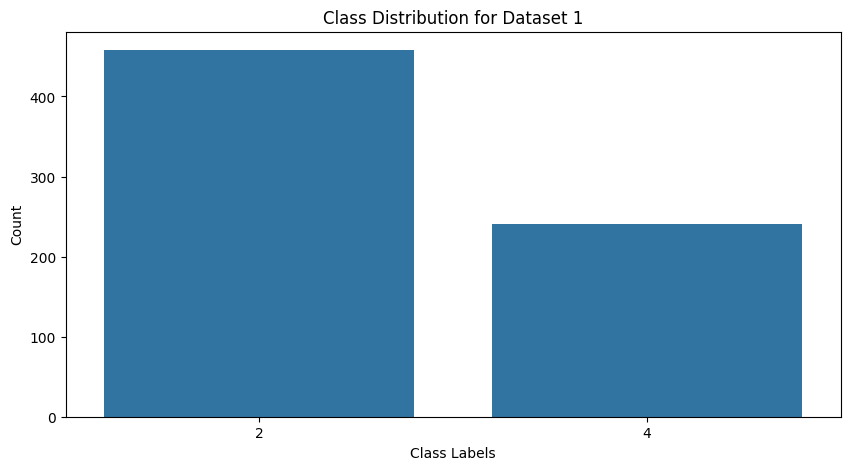

In [9]:
# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y1)
plt.title("Class Distribution for Dataset 1")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

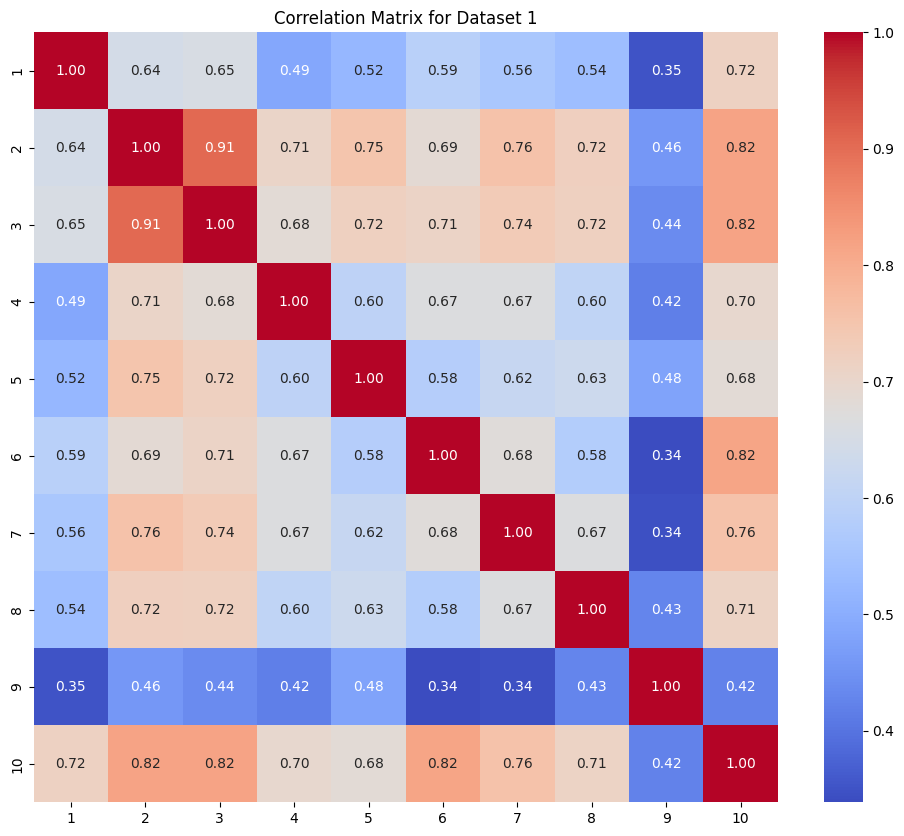

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(data1.iloc[:, 1:]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix for Dataset 1")
plt.show()

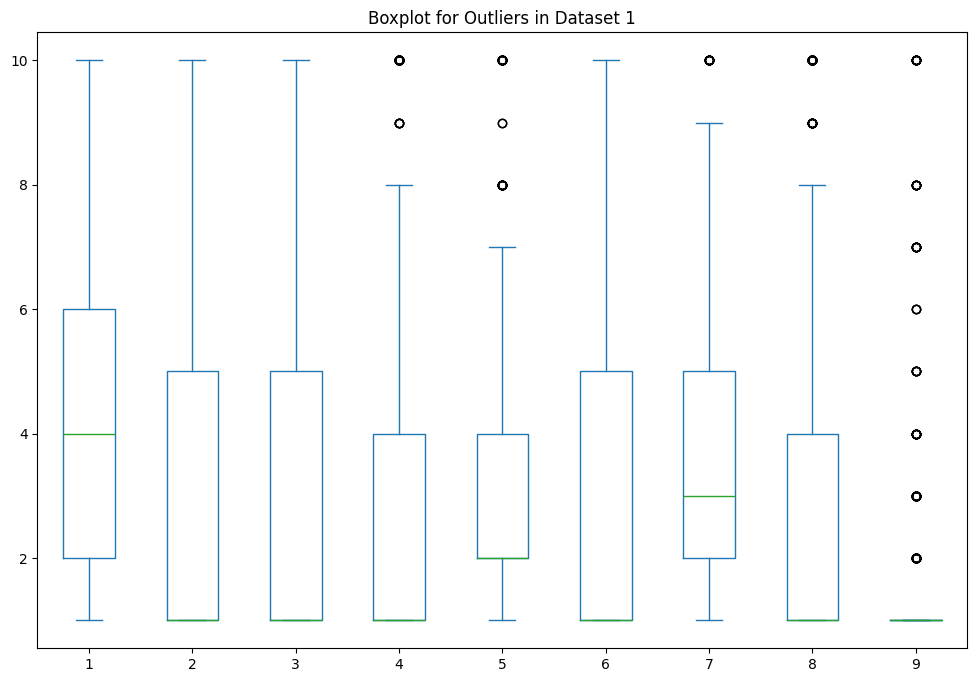

In [11]:
# Box plot for outliers
data1.iloc[:, 1:-1].plot(kind='box', figsize=(12, 8))
plt.title("Boxplot for Outliers in Dataset 1")
plt.show()

In [12]:
# Step 9: Model training and evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [13]:
# Cross-validation
print("Cross-validation Results for Dataset 1:")
results_1 = {}
for name, model in models.items():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X1_train, y1_train, cv=kf, scoring='f1_macro')
    results_1[name] = scores.mean()
    print(f"{name}: Mean F1 Score = {scores.mean():.4f}")

Cross-validation Results for Dataset 1:
Random Forest: Mean F1 Score = 0.9553
Logistic Regression: Mean F1 Score = 0.9586
SVM: Mean F1 Score = 0.9612
KNN: Mean F1 Score = 0.9506
Decision Tree: Mean F1 Score = 0.9315


In [14]:
# Best model selection
best_model_name_1 = max(results_1, key=results_1.get)
print(f"Best Model for Dataset 1: {best_model_name_1} with F1 Score = {results_1[best_model_name_1]:.4f}")

Best Model for Dataset 1: SVM with F1 Score = 0.9612


In [15]:
# Step 10: Hyperparameter tuning
print("\nHyperparameter Tuning for Dataset 1")
best_model_1 = models[best_model_name_1]
param_grid_1 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

if best_model_name_1 == "SVM":  # Perform tuning for SVM
    grid_1 = GridSearchCV(best_model_1, param_grid_1, cv=5, scoring='f1_macro')
    grid_1.fit(X1_train, y1_train)
    print(f"Best Parameters for Dataset 1: {grid_1.best_params_}")
    print(f"Best F1 Score for Dataset 1 (after tuning): {grid_1.best_score_:.4f}")


Hyperparameter Tuning for Dataset 1
Best Parameters for Dataset 1: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score for Dataset 1 (after tuning): 0.9612


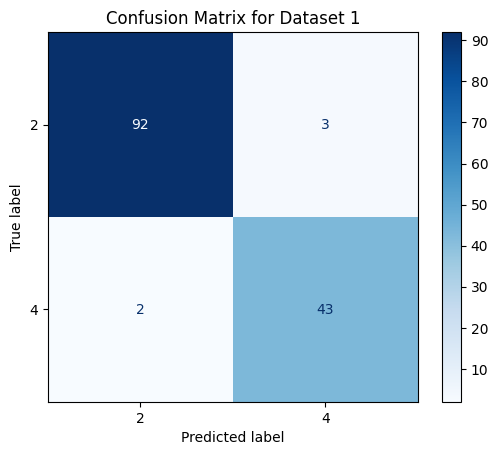

Classification Report for Dataset 1:
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [16]:
# Step 10: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set using the best estimator from GridSearchCV
y1_pred = grid_1.best_estimator_.predict(X1_test)

# Generate the confusion matrix
conf_matrix_1 = confusion_matrix(y1_test, y1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_1, display_labels=grid_1.best_estimator_.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix for Dataset 1")
plt.show()

# Print classification report for additional metrics
print("Classification Report for Dataset 1:")
print(classification_report(y1_test, y1_pred))

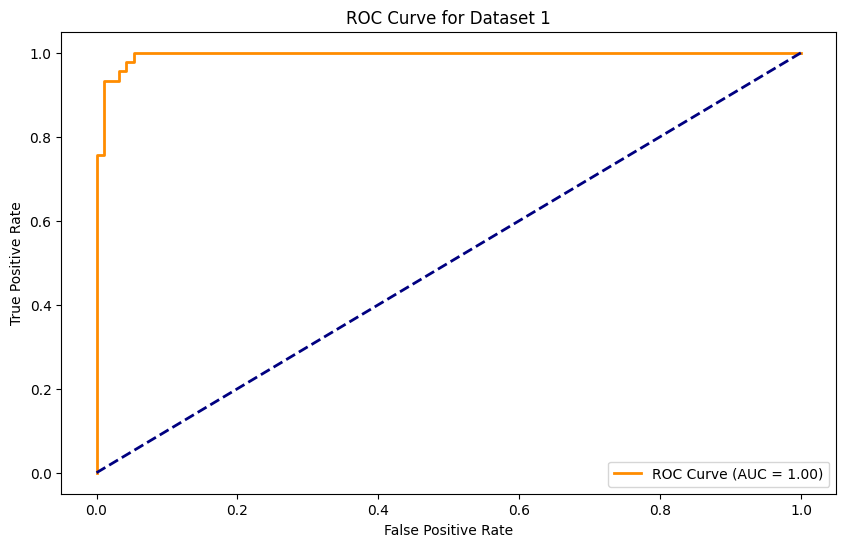

In [17]:
# Step 12: ROC Curve and AUC
if best_model_name_1 == "SVM":
    y1_pred_prob = grid_1.best_estimator_.decision_function(X1_test)
    fpr1, tpr1, _ = roc_curve(y1_test, y1_pred_prob, pos_label=4)
    roc_auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc1:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve for Dataset 1")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [18]:
#Thank You, Rahulkumar Shiyani